In [1]:
#Dùng pipeline 2
#Data->Standardization->Normalization->Model
import pandas as pd
# Đường dẫn đến tệp CSV
file_path = 'dulieuxettuyendaihoc.csv'
# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path,encoding='utf-8')
# Hiển thị một số dòng đầu của DataFrame
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [2]:
from sklearn.model_selection import train_test_split

df=df[['T5','T6','NGONNGU']]

x=df[['T5','T6']].values
y=df[['NGONNGU']].values

# mức 20% random=16
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=16)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #z-score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn import metrics
import numpy as np
steps=[('standar',StandardScaler()),('model',LinearRegression())]

In [4]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('standar', StandardScaler()), ('model', LinearRegression())])

In [5]:
model=pipe.fit(x_train,y_train)

In [6]:
#Sinh viên tự đánh giá mô hình thông qua: score, MAE, RMSE và MAPE
y_test_pred=pipe.predict(x_test)
y_test_pred

array([[3.74585912],
       [4.28584787],
       [3.25170331],
       [3.51703355],
       [3.81176569],
       [3.63158978],
       [4.04258212],
       [3.53513373],
       [3.61178564],
       [3.87541191],
       [3.60443081],
       [3.65449755],
       [3.62536513],
       [3.59962322],
       [3.81488672],
       [3.61207254],
       [3.5102351 ],
       [3.6177234 ],
       [4.12319835],
       [3.68023945]])

In [7]:
#tính test
print('Score or R-Squared: ', model.score(x_test,y_test))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared:  -0.07691460875153733
Mean Absolute Error:  1.1905472933346881
Mean Squared Error:  1.9874122568694386
Root Mean Squared Error:  1.409756098362209
Mean Absolute Percentage Error:  0.3812386409968104


In [8]:
vT5=6.0
vT6=7.5

predicted_ngonngu=pipe.predict([[vT5,vT6]])

print('Giá trị dự báo điểm ngôn ngữ: ',predicted_ngonngu)

Giá trị dự báo điểm ngôn ngữ:  [[3.44348526]]


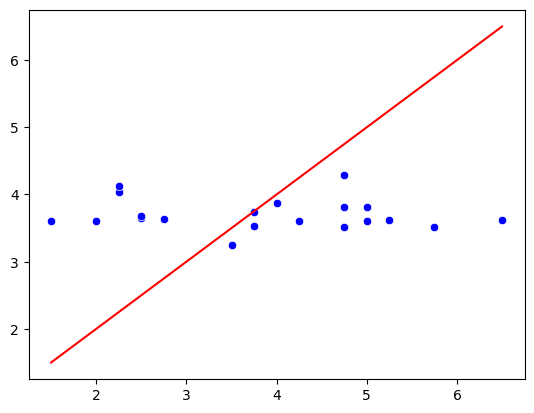

In [9]:
#vẽ Scatter test
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),markers='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),markers='o',color='b')
plt.show()

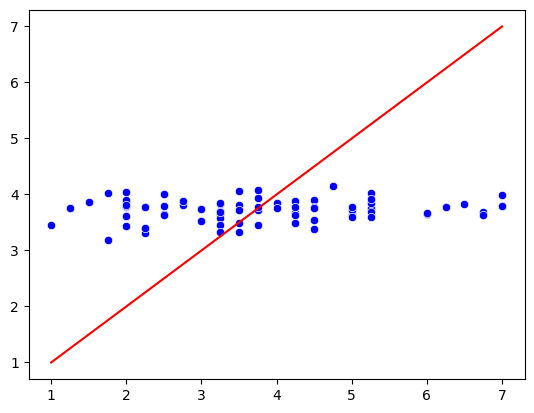

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
y_train_pred=pipe.predict(x_train)
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),markers='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),markers='o',color='b')
plt.show()

In [ ]:

#tính cột train

y_train_pred=model.predict(x_train)
print('Train')
print('Score or R-Squared: ', model.score(x_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Train
Score or R-Squared:  0.01846517069125675
Mean Absolute Error:  1.1471162639928523
Mean Squared Error:  2.0086861063975676
Root Mean Squared Error:  1.4172812375804484
Mean Absolute Percentage Error:  0.3941285255756852


In [12]:
y_test_pred=model.predict(x_test)
dfTestValidation=pd.DataFrame(list(zip(x_test[:,0],x_test[:,1],
                                       y_test.flatten(),
                                       y_test_pred.flatten())),
                              columns=['T5_test','T6_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test']-dfTestValidation['y_test_predicted']
#zip tạo data frame dựa trên mảng
dfTestValidation
                             

,T5_test,T6_test,y_test,y_test_predicted,Residual
0,8.5,8.3,3.75,3.745859,0.004141
1,5.8,3.7,4.75,4.285848,0.464152
2,6.8,9.0,3.50,3.251703,0.248297
3,4.0,5.5,5.75,3.517034,2.232966
4,8.6,8.1,4.75,3.811766,0.938234
5,5.3,6.1,2.75,3.631590,-0.881590
6,8.0,6.6,2.25,4.042582,-1.792582
7,5.4,6.6,3.75,3.535134,0.214866
8,7.1,7.7,2.00,3.611786,-1.611786
9,7.5,6.9,4.00,3.875412,0.124588


In [13]:
y_train_pred=model.predict(x_train)
dfTrainValidation=pd.DataFrame(list(zip(x_train[:,0],x_train[:,1],
                                       y_train.flatten(),
                                       y_train_pred.flatten())),
                              columns=['T5_train','T6_train','y_train','y_train_predicted'])
dfTrainValidation['Residual']=dfTrainValidation['y_train']-dfTrainValidation['y_train_predicted']
#zip tạo data frame dựa trên mảng
dfTrainValidation

,T5_train,T6_train,y_train,y_train_predicted,Residual
0,5.5,5.7,5.25,3.763403,1.486597
1,8.5,7.8,1.50,3.861832,-2.361832
2,8.9,8.5,6.25,3.777539,2.472461
3,4.9,6.5,1.00,3.460742,-2.460742
4,8.0,7.2,4.50,3.903414,0.596586
...,...,...,...,...,...
75,6.3,8.0,4.50,3.386064,1.113936
76,8.4,8.1,3.75,3.772731,-0.022731
77,5.0,5.1,2.00,3.804985,-1.804985
78,3.5,5.6,2.25,3.396253,-1.146253


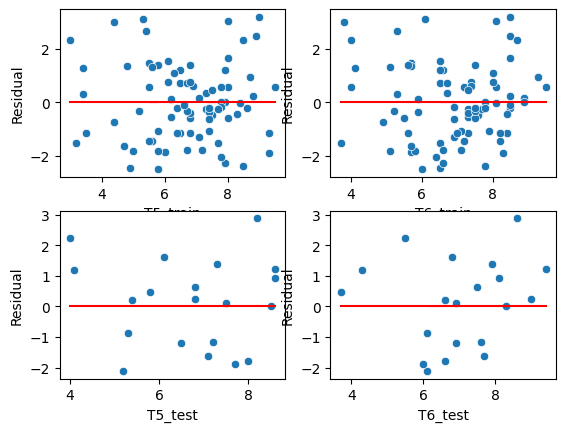

In [14]:
fig, axes=plt.subplots(2,2)
#tập train
sns.scatterplot(data=dfTrainValidation, x='T5_train',y='Residual',ax=axes[0,0])
sns.lineplot(data=dfTrainValidation,x='T5_train',y=[0]*len(dfTrainValidation),color='r',ax=axes[0,0])
sns.scatterplot(data=dfTrainValidation,x='T6_train',y='Residual',ax=axes[0,1])
sns.lineplot(data=dfTrainValidation,x='T6_train',y=[0]*len(dfTrainValidation),color='r',ax=axes[0,1])
# tập test
sns.scatterplot(data=dfTestValidation, x='T5_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='T5_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='T6_test',y='Residual',ax=axes[1,1])
sns.lineplot(data=dfTestValidation,x='T6_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,1])
plt.show()

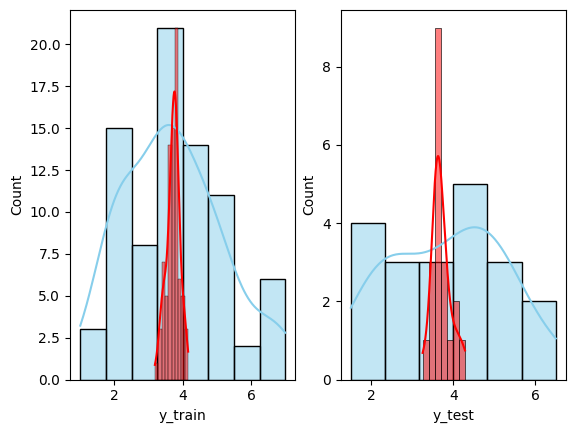

In [15]:
#biểu đồ histogram phân phối tập train và test
fig, axes=plt.subplots(1,2) #1 dòng 2 cột
#tập train
sns.histplot(data=dfTrainValidation,x='y_train',color='skyblue',label='Actual',kde=True,ax=axes[0])
sns.histplot(data=dfTrainValidation,x='y_train_predicted',color='red',label='Forecast',kde=True,ax=axes[0])
#tập test
sns.histplot(data=dfTestValidation,x='y_test',color='skyblue',label='Actual',kde=True,ax=axes[1])
sns.histplot(data=dfTestValidation,x='y_test_predicted',color='red',label='Forecast',kde=True,ax=axes[1])
plt.show()